In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# Look at the survival rate in gender
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
# Survival Rate of different sex in different classes
df.pivot_table('Survived',index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

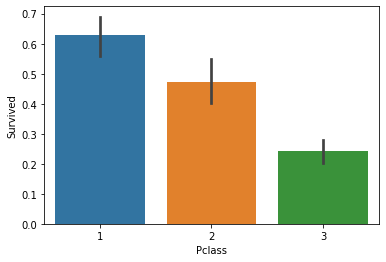

In [8]:
# Plot the survival rate of each class
sns.barplot(x = 'Pclass', y = 'Survived', data = df)

In [9]:
# Looking at the survival rate by sex, age, Pclass
age = pd.cut( df.Age, [0,18,80] )
df.pivot_table('Survived',['Sex',age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

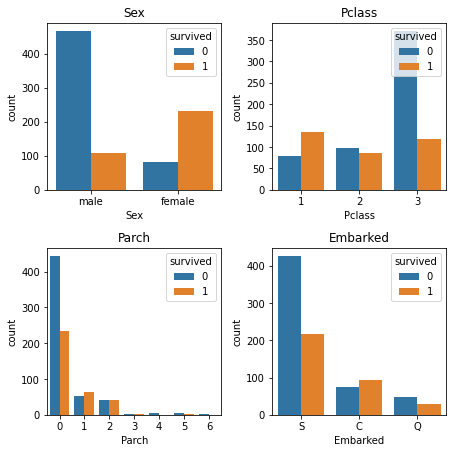

In [10]:
cols = ['Sex','Pclass','Parch','Embarked']

n_rows = 2
n_cols = 2

# Subplot grid and figure sizes for each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_rows*3.2, n_cols*3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c
        ax = axs[r][c]  # position of subplots
        sns.countplot(df[cols[i]], hue = df['Survived'], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived',loc = 'upper right')
        
plt.tight_layout()

<AxesSubplot:ylabel='Frequency'>

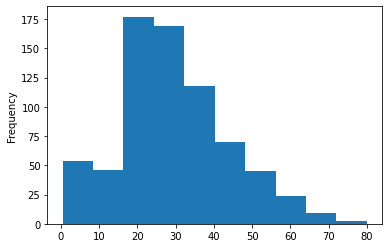

In [11]:
df['Age'].plot.hist()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

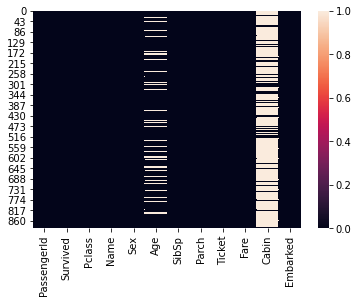

In [14]:
# Heat Map
sns.heatmap(df.isnull())

In [15]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df.dropna (inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df.dropna(inplace = True)
df.shape

(712, 11)

<AxesSubplot:>

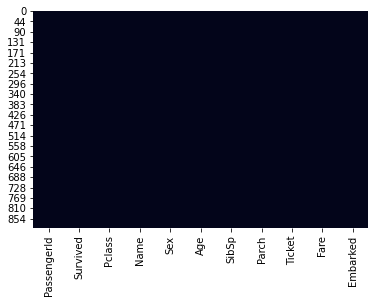

In [18]:
# Heat Map
sns.heatmap(df.isnull(), cbar = False)

In [19]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encoding the columns
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)

df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7].values)

In [22]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Building ML Model 

In [24]:
# Split the data for independent (x) and dependent (y) variables

X = df.iloc[:,1:8].values
y = df.iloc[:,0].values

In [25]:
# Split the dataset for training (80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# train_test_split

In [26]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
# Use logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Get and train all of the models
training_accuracy = model.score(X_train, y_train)
print(training_accuracy)

0.7978910369068541


In [32]:
# Show the confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model.predict(X_test))
    
    # Extract TN, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_test, model.predict(X_test)).ravel()
    
test_score = (TP+TN)/(TP+TN+FP+FN)
    
print(cm)
print("Model Testing Accuracy: ", test_score)
print()

[[75  7]
 [19 42]]
Model Testing Accuracy:  0.8181818181818182



In [35]:
predictions = model.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [39]:
import pickle
# open a file where you want to store the data
file = open('logistic_regression_model.pkl','wb')

# dump info to that file
pickle.dump(model, file)